In [2]:
#Change directory to data location
import os
path = 'E:\Daily Reanalisis ERA 5 v2'
os.chdir(path)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Read time-event excel data
censevt=pd.read_excel('calculation_output\CENS Event 3 days Running Mean.xlsx')
censevt=censevt.set_index('time_cens')

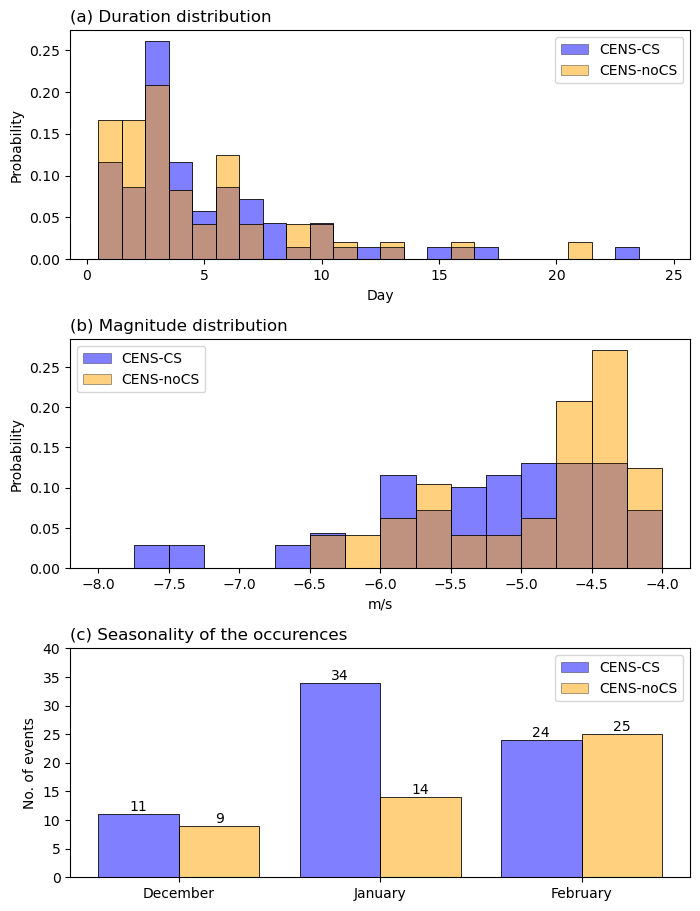

In [6]:
fig = plt.figure(figsize=(8,11))
plt.subplot(3, 1, 1)
countdurcs, bins_countdurcs = np.histogram(censevt[censevt['cs event']==1]['duration'], bins=24, range=(0.5,24.5))
countdurncs, bins_countdurncs = np.histogram(censevt[censevt['cs event']==0]['duration'], bins=24, range=(0.5,24.5))
plt.bar((bins_countdurcs[:-1] + bins_countdurcs[1:])/2, countdurcs/len(censevt[censevt['cs event']==1]), color='b', align='center', width=1, alpha=0.5, edgecolor='k', linewidth=0.5, label='CENS-CS')
plt.bar((bins_countdurncs[:-1] + bins_countdurncs[1:])/2, countdurncs/len(censevt[censevt['cs event']==0]), color='orange', align='center', width=1, alpha=0.5, edgecolor='k', linewidth=0.5, label='CENS-noCS')
plt.bar((bins_countdurcs[:-1] + bins_countdurcs[1:])/2, countdurcs/len(censevt[censevt['cs event']==1]), color='b', align='center', width=1, facecolor="None", edgecolor='k', linewidth=0.5)
plt.bar((bins_countdurncs[:-1] + bins_countdurncs[1:])/2, countdurncs/len(censevt[censevt['cs event']==0]), color='orange', align='center', width=1, facecolor="None",  edgecolor='k', linewidth=0.5)
plt.legend()
plt.title('(a) Duration distribution', loc='left')
plt.ylabel('Probability')
plt.xlabel('Day')

plt.subplot(3, 1, 2)
countmagcs, bins_countmagcs = np.histogram(censevt[censevt['cs event']==1]['maxmagnitude'], bins=16, range=(-8,-4))
countmagncs, bins_countmagncs = np.histogram(censevt[censevt['cs event']==0]['maxmagnitude'], bins=16, range=(-8,-4))
plt.bar((bins_countmagcs[:-1] + bins_countmagcs[1:])/2, countmagcs/len(censevt[censevt['cs event']==1]), color='b', align='center', width=0.25, alpha=0.5, edgecolor='k', linewidth=0.5, label='CENS-CS')
plt.bar((bins_countmagncs[:-1] + bins_countmagncs[1:])/2, countmagncs/len(censevt[censevt['cs event']==0]), color='orange', align='center', width=0.25, alpha=0.5, edgecolor='k', linewidth=0.5, label='CENS-noCS')
plt.bar((bins_countmagcs[:-1] + bins_countmagcs[1:])/2, countmagcs/len(censevt[censevt['cs event']==1]), align='center', width=0.25, facecolor="None", edgecolor='k', linewidth=0.5)
plt.bar((bins_countmagncs[:-1] + bins_countmagncs[1:])/2, countmagncs/len(censevt[censevt['cs event']==0]), align='center', width=0.25, facecolor="None", edgecolor='k', linewidth=0.5)
plt.legend()
plt.title('(b) Magnitude distribution', loc='left')
plt.ylabel('Probability')
plt.xlabel('m/s')

plt.subplot(3, 1, 3)
censcsm=censevt[censevt['cs event']==1].groupby(censevt[censevt['cs event']==1].index.month).count()['maxmagnitude'].values
censncsm=censevt[censevt['cs event']==0].groupby(censevt[censevt['cs event']==0].index.month).count()['maxmagnitude'].values
barscs=plt.bar([0.8,1.8,2.8],[censcsm[-1],censcsm[0],censcsm[1]], width=0.4, color='b', align='center', alpha=0.5, edgecolor='k', linewidth=0.5, label='CENS-CS')
barsncs=plt.bar([1.2,2.2,3.2],[censncsm[-1],censncsm[0],censncsm[1]], width=0.4, color='orange', align='center', alpha=0.5, edgecolor='k', linewidth=0.5, label='CENS-noCS')
plt.bar([0.8,1.8,2.8],[censcsm[-1],censcsm[0],censcsm[1]], width=0.4, facecolor="None", align='center', edgecolor='k', linewidth=0.5)
plt.bar([1.2,2.2,3.2],[censncsm[-1],censncsm[0],censncsm[1]], width=0.4, facecolor="None", align='center', edgecolor='k', linewidth=0.5)
plt.xticks([1,2,3], ['December', 'January', 'February'])
plt.legend()
plt.title('(c) Seasonality of the occurences', loc='left')
plt.ylabel('No. of events')
plt.bar_label(barscs)
plt.bar_label(barsncs)
plt.ylim([0,40])

fig.subplots_adjust(wspace=0.25, hspace=0.35)
plt.savefig('figure_output\Fig 2.pdf', bbox_inches='tight')
plt.show()